# Types

Every object in Julia has a type that can be accessed with `typeof`.

### Integers

In [1]:
1

1

In [2]:
typeof(1)

Int64

The default system integer type is aliased to `Int`. On my 64-bit machine, it is an `Int64`

In [3]:
Int

Int64

### Unsigned integers

In [4]:
0x0

0x00

In [5]:
0x0 + 0x1

0x01

In [6]:
typeof(0x0)

UInt8

### Floating point numbers

By default, real numbers are represented by 64-bit "double precision" IEEE standard floating point numbers (the same as `double` in C). Literals are written with a decimal point:

In [7]:
2.0 + 4.0

6.0

In [8]:
typeof(2.0)

Float64

You can also use "single precision" 32-bit floating point numbers. with an `f0` at the end.

In [9]:
typeof(2.0f0)

Float32

### Rationals

In [12]:
332//241

332//241

In [13]:
332//241 - 235//128

-14139//30848

### Strings

In [14]:
"Life is a POMDP"

"Life is a POMDP"

In [15]:
convert(Float64, 1)

1.0

# Type Conversion

In [1]:
convert(Float64, 1)

1.0

# Variables

Variables are names assigned to objects.

In [33]:
a = 1

1

In [21]:
b = a
a = 5
b

1

In [22]:
a + b

6

A variable does not have a type - only the object that it refers to has a type.

In [23]:
c = 1
typeof(c)

Int64

In [24]:
c = 3.2
typeof(c)

Float64

# Vectors

In [25]:
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [26]:
push!(v, 4)

4-element Vector{Int64}:
 1
 2
 3
 4

The type in the curly brackets indicates what kind of objects the vector can contain. 

In [27]:
push!(v, "string")

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number at /opt/julia-1.7.1/share/julia/base/number.jl:6
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number at /opt/julia-1.7.1/share/julia/base/number.jl:7
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at /opt/julia-1.7.1/share/julia/base/twiceprecision.jl:262
[0m  ...

`Vector{Any}` objects can contain any type of object, but they are less efficient.

In [28]:
Any[1, 2.0, "three"]

3-element Vector{Any}:
 1
 2.0
  "three"

### Indexing

In [30]:
v[1]

1

In [31]:
v[1] = 5
v

4-element Vector{Int64}:
 5
 2
 3
 4

# Mutable and Immutable Types

Some types, such as `Int` and `Float64` are immutable - that means the objects themselves can never be modified. Other types, such as `Vector` are mutable and the objects can be modified.

In [34]:
a = 1
b = a
a += 1
a, b

(2, 1)

In [35]:
v = [1,2]
u = v
u[1] = 5
u, v

([5, 2], [5, 2])

Convention: functions with `!` (pronounced "bang") modify their arguments

In [36]:
a = [1,2]
push!(a, 3)
a

3-element Vector{Int64}:
 1
 2
 3

# Printline debugging

In [37]:
a = [1,2,3]
@show a # Things that beging with @ like @show are "macros"
a + a

a = [1, 2, 3]


3-element Vector{Int64}:
 2
 4
 6

In [38]:
a = [1,2,3]
display(a)
a + a

3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Int64}:
 2
 4
 6

In [39]:
a = [1,2,3]
@debug("debug doesn't print by default", a)
@info("some info", a)
@warn("a warning", a)
@error("an error message (with no exception)", a)

┌ Info: some info
│   a = [1, 2, 3]
└ @ Main In[39]:3
┌ Warning: a warning
│   a = [1, 2, 3]
└ @ Main In[39]:4
┌ Error: an error message (with no exception)
│   a = [1, 2, 3]
└ @ Main In[39]:5


In [40]:
using Logging
debuglogger = ConsoleLogger(stderr, Logging.Debug)
with_logger(debuglogger) do
    @debug("this debug message will print")
end

┌ Debug: this debug message will print
└ @ Main In[40]:4


# Functions

In [41]:
function f(x)
    return x^2
end

f (generic function with 1 method)

In [42]:
f(x) = x^2

f (generic function with 1 method)

In [44]:
f(2.0)

4.0

### Methods and multiple dispatch

In [45]:
function f(x::Float64)
    println("A float!")
    return x^2
end

f (generic function with 2 methods)

In [46]:
function f(x::Int)
    println("An int!")
    return x^2
end

f (generic function with 3 methods)

In [47]:
f(1)

An int!


1

In [48]:
f(2.0)

A float!


4.0

In [49]:
f("three")

"threethree"

In [50]:
methods(f)

# 3 methods for generic function "f":
[1] f(x::Float64) in Main at In[45]:1
[2] f(x::Int64) in Main at In[46]:1
[3] f(x) in Main at In[42]:1

# Plotting

In [51]:
using Plots # the first time this will be slow because it's compiling

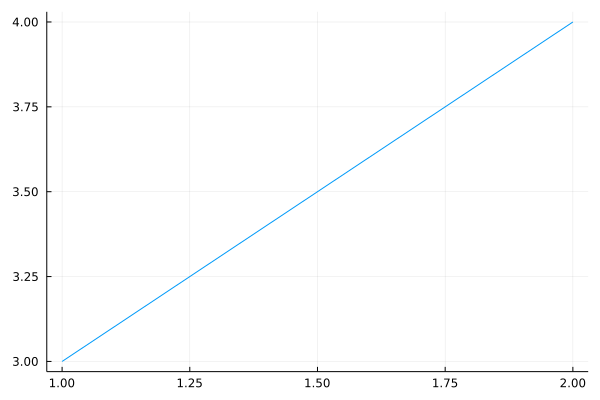

In [52]:
plot([1,2], [3,4], label=nothing) # also slow the first time

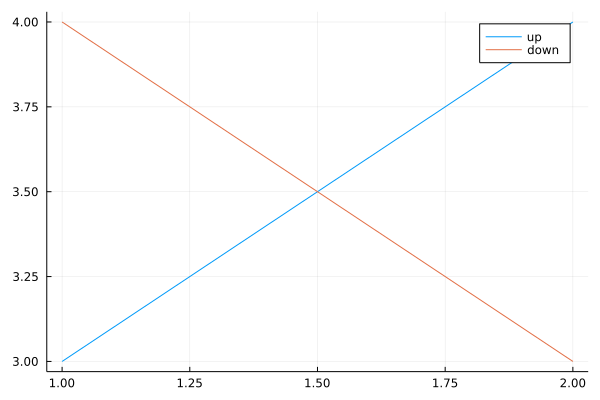

In [53]:
plot([1,2], [3,4], label="up")
plot!([1,2], [4,3], label="down") # plot! adds another plot

# Type stability

You want to make it easy for the compiler to predict what your function will return.

In [54]:
function good()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0.0
    end
end

good (generic function with 1 method)

In [56]:
function bad()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0
    end
end

bad (generic function with 1 method)

In [57]:
@code_warntype bad()

MethodInstance for bad()
  from bad() in Main at In[56]:1
Arguments
  #self#::Core.Const(bad)
Body::Union{Float64, Int64}
1 ─ %1 = Main.rand()::Float64
│   %2 = (%1 > 0.5)::Bool
└──      goto #3 if not %2
2 ─ %4 = Main.sqrt(2.0)::Float64
└──      return %4
3 ─      return 0



In [58]:
@code_warntype good()

MethodInstance for good()
  from good() in Main at In[54]:1
Arguments
  #self#::Core.Const(good)
Body::Float64
1 ─ %1 = Main.rand()::Float64
│   %2 = (%1 > 0.5)::Bool
└──      goto #3 if not %2
2 ─ %4 = Main.sqrt(2.0)::Float64
└──      return %4
3 ─      return 0.0

